# Fit data using `Minimize`
**on the power of object oriented programation**

In this notebook, developped in together during the class, we will fit predifined data using two models. We will develop a fitting technique that can handle any can of model that we can fit with a chi2 technique.

In [5]:
# ==  Basic import == #
# plot within the notebook
%matplotlib inline
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import matplotlib.pyplot as mpl

# Data - Sinus + linear function 

The input model is the following:
$$
y = \mathrm{A} \sin(x) + \mathrm{B}  x 
$$
it has 2 parameters: A and B.

We are going to create $y$ based on $x$ ranging between 0 and 20 for a sample of 200 points. The errors on $y$ will be random errors with a scale of 7.

#### Data used: A= 10 ; B = 4

In [9]:
x = np.linspace(0,20,100)

In [10]:
dy = np.random.normal(0,7,100)
y = 10*np.sin(x) + 4*x + dy

The is how it looks like

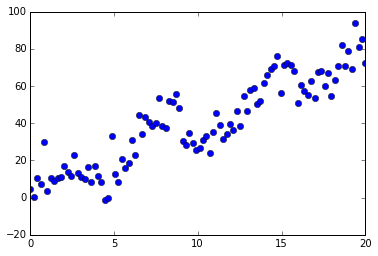

In [11]:
mpl.plot(x,y,"ob")

# The Fitting class

We saw the inheritance concept in class. Here the Parent class has all the modules requested for the fit, and the child classes will have to have the `get_model` method, that takes in input `parameters` and return a model-array. This model will then be compared to the data in the Parent's `get_chi2` method.

In [33]:
class Chi2Fit( object ):
    
    def __init__(self, x, data, errors):
        """ init the class
        
        Parameters:
        -----------
        x: [array]
            the x-axis used for the modeling. 
        data, errors: [arrays]
            measurement and its associated errors
        
        Note: x,data and errors must have the same size
        
        Return
        ------
        Void
        """
        self.x    = np.asarray(x)
        self.data = np.asarray(data)
        self.errors = np.asarray(errors)
        self.npoints = len(data)
        
    def fit(self,guess):
        """ fit the model to the data 
        
        The methods uses scipy.optimize.minize to fit the model 
        to the data. The fit output is saved as self.fitout, the 
        best fit parameters being self.fitout["x"]
        
        Parameters
        ----------
        guess: [array]
            initial guess for the minimizer. It's size must correspond
            to the amount of free parameters of the model.
            
        Return
        ------
        Void (create self.fitout)
        """
        from scipy.optimize import minimize
        self.fitout = minimize(self.chi2, guess)
        print self.fitout
        
    def get_model(self,parameters):
        """ YOU HAVE TO IMPLEMENT THIS METHOD
        
        This method should return the model-array that will be 
        compared to self.data
        """
        raise NotImplementedError(" CREATE IT IN YOUR CLASS") 
        
        
    def chi2(self,parameters):
        """ The chi2 of the model with the given `parameters` 
        in comparison to the object's data 
        
        Return
        ------
        float (the chi2)
        """
        res = self.data - self.get_model(parameters)
        chi2 = (res**2)/(self.errors**2)
        return np.sum(chi2)
    
    def plot(self, parameters):
        """ Vizualize the data and the model for the given
        parameters
        
        Return
        ------
        Void
        """
        fig = mpl.figure()
        ax = fig.add_subplot(1,1,1)
        ax.errorbar(self.x,self.data, yerr= self.errors, 
                    ls="None",marker='o', color="b", ecolor="0.7")
        ax.plot(self.x,self.get_model(parameters),'-r')
        fig.show()
        
# ----------------- #
# The Actual Model  #
# ----------------- #
class SinFit( Chi2Fit ):
    def get_model(self,parameters):
        """ the modeled array for the given parameters
        The model is:
        $$
          A sin(x) + B*x
        $$
        such that A,B = parameters
        
        Return
        ------
        array
        """
        A,B = parameters
        return A*np.sin(self.x) + B*self.x

class LinFit( Chi2Fit ):
    def get_model(self,parameters):
        """ the modeled array for the given parameters
        The model is:
        $$
          A + B*x
        $$
        such that A,B = parameters
        
        Return
        ------
        array
        """
        A,B = parameters
        return A + B*self.x

In [34]:
sinfit = SinFit(x,y,dy)
linfit = LinFit(x,y,dy)

In [35]:
sinfit.fit([2,3])

   status: 0
  success: True
     njev: 7
     nfev: 28
 hess_inv: array([[  4.50599500e-03,   1.15539475e-04],
       [  1.15539475e-04,   2.71583739e-05]])
      fun: 96.24270930385714
        x: array([ 9.89861855,  3.98614742])
  message: 'Optimization terminated successfully.'
      jac: array([  8.58306885e-06,   7.62939453e-06])


In [36]:
linfit.fit([2,3])

   status: 2
  success: False
     njev: 33
     nfev: 140
 hess_inv: array([[ 0.01194996, -0.00105857],
       [-0.00105857,  0.00011793]])
      fun: 10710.244531828332
        x: array([-2.59320352,  3.96694916])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ 0.        , -0.00024414])


[ 9.89861855  3.98614742]
(the input being: 10, 4)


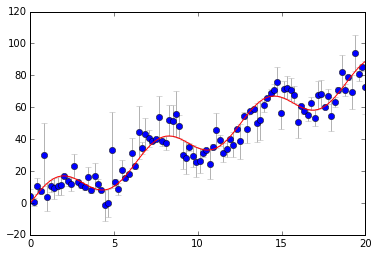

In [45]:
sinfit.plot(sinfit.fitout["x"])
print(sinfit.fitout["x"])
print("(the input being: 10, 4)")

[-2.59320352  3.96694916]


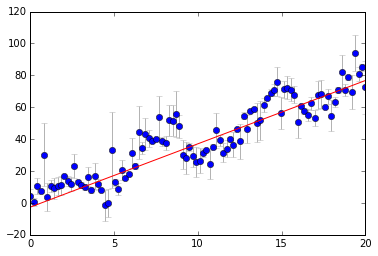

In [41]:
linfit.plot(linfit.fitout["x"])
print(linfit.fitout["x"])